# Mannahil Miftah (20K-0234) 
# Alishba Subhani (20K-0351)

# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [5]:
data = pd.read_excel(r'C:\Users\Mannahil Miftah\Downloads\superstore.xls')
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


# Dropping Unnecessary Columns

In [6]:
data.drop('Row ID',inplace=True,axis=1)
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# Analyzing Data

In [8]:
data.isnull().values.sum()

0

In [9]:
#printing values of all attributes to identify if any attribute has ? 
allColumns = data.columns
for c in allColumns:
    missed = data[c].isin(['?']).sum()
    if missed > 0:
        print(c, "\t", missed)

In [10]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Cleaning

In [11]:
#checking for null values
data.isnull().values.any()

False

In [12]:
data.shape

(9994, 20)

# 5 Most Popular Products

In [13]:
popular_products = pd.DataFrame(data.groupby('Product Name')['Sales'].count())
most_popular = popular_products.sort_values('Sales', ascending=False)
most_popular.head(5)

,Sales
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19


<AxesSubplot:xlabel='Product Name'>

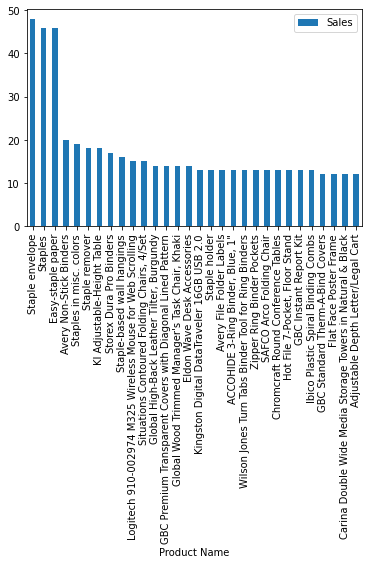

In [14]:
most_popular.head(30).plot(kind = "bar")

# Most Sold Segment

In [15]:
sold_segments = pd.DataFrame(data.groupby('Segment')['Sales'].count())
most_sold = sold_segments.sort_values('Sales', ascending=False)
most_sold

,Sales
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


<AxesSubplot:xlabel='Segment'>

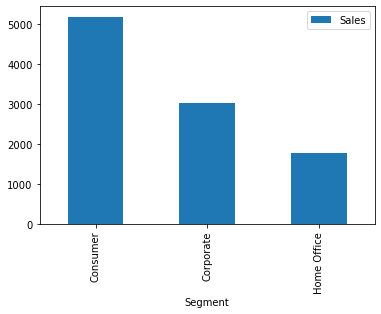

In [16]:
most_sold.plot(kind = "bar")

# Most Profitable City

In [17]:
profitable_city = pd.DataFrame(data.groupby('City')['Profit'].count())
most_profit = profitable_city.sort_values('Profit', ascending=False)
most_profit

,Profit
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Redwood City,1
Holyoke,1
Redding,1


# Pre Processing data to be applied on any ML algo

In [18]:
data1 = data.copy()
data1 = data1.apply(LabelEncoder().fit_transform)

In [19]:
sales = data1['Sales']

In [20]:
scaler = StandardScaler().fit(data1.drop('Sales', axis = 1))
features = scaler.transform(data1.drop('Sales', axis = 1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, sales, test_size = 0.1)

#### Data is PROCESSED now and is READY

Text(0, 0.5, 'Inertia')

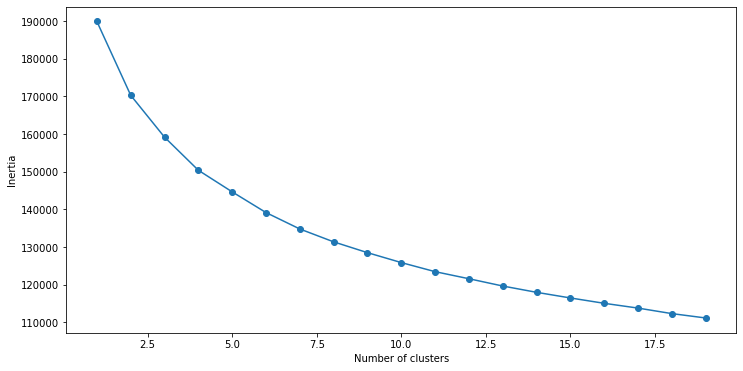

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
pd.DataFrame(data_scaled)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
kmeans = KMeans(n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    1813
3    1655
0    1538
4    1420
6    1375
2    1308
5     885
Name: cluster, dtype: int64